# __EDA(Assignment)__ 

## __EDA 1 (Bike Details Dataset)__

#### 1.What is the range of selling prices in the dataset?

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('BIKE DETAILS.csv')
df.max()

name                   Yo Style
selling_price            760000
year                       2020
seller_type          Individual
owner                 4th owner
km_driven                880000
ex_showroom_price     1278000.0
dtype: object

In [14]:
df.min()

name                 Activa 3g
selling_price             5000
year                      1988
seller_type             Dealer
owner                1st owner
km_driven                  350
ex_showroom_price      30490.0
dtype: object

In [22]:
selling_price_range=df['selling_price'].max() - df['selling_price'].min()
print("Range of Selling Price:",selling_price_range)

Range of Selling Price: 755000


#### 2. What is the median selling price for bikes in the dataset?

In [23]:
median_selling_price=df['selling_price'].median()
print(" median selling price for bikes:",median_selling_price)


 median selling price for bikes: 45000.0


#### 3. What is the most common seller type?

In [24]:
cmn_slr_typ=df['seller_type'].mode()
print("the most common seller type:",cmn_slr_typ)

the most common seller type: 0    Individual
Name: seller_type, dtype: object


#### 4.How many bikes have driven more than 50,000 kilometers?

In [3]:
high_mileage_bikes = df[df['km_driven'] > 50000]
num_high_mileage_bikes = high_mileage_bikes.shape[0]
print(f"Number of bikes that have driven more than 50,000 kilometers: {num_high_mileage_bikes}")

Number of bikes that have driven more than 50,000 kilometers: 170


#### 5.What is the average km_driven value for each ownership type?

In [29]:
avg_km_drv=df.groupby('owner')['km_driven'].mean()
print(" the average km_driven value for each ownership type:\n\n",avg_km_drv)

 the average km_driven value for each ownership type:

 owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


#### 6.What proportion of bikes are from the year 2015 or older?

In [7]:
bikes_2015_or_older = df[df['year'] <= 2015]
total_bikes = df.shape[0]
bikes_2015_or_older_count = bikes_2015_or_older.shape[0]
proportion = bikes_2015_or_older_count / total_bikes
print(f"The proportion of bikes from the year 2015 or older is {proportion:.2%}")

The proportion of bikes from the year 2015 or older is 56.64%


#### 7.What is the trend of missing values across the dataset?

In [8]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


#### 8.What is the highest ex_showroom_price recorded, and for which bike?

In [20]:
max_price_row = df.loc[df['ex_showroom_price'].idxmax()]
bike_name = max_price_row['name']
max_price = max_price_row['ex_showroom_price']
print(f"The highest ex_showroom_price is {max_price} for the bike: {bike_name}")

The highest ex_showroom_price is 1278000.0 for the bike: Harley-Davidson Street Bob


#### 9.What is the total number of bikes listed by each seller type?

In [24]:
total_bikes=df.groupby('seller_type')['selling_price'].count()
print(total_bikes)

seller_type
Dealer           6
Individual    1055
Name: selling_price, dtype: int64


#### 10. What is the relationship between selling_price and km_driven for first-owner bikes?

In [29]:
first_owner=df[df['owner']== "1st owner" ]
first_owner

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
...,...,...,...,...,...,...,...
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


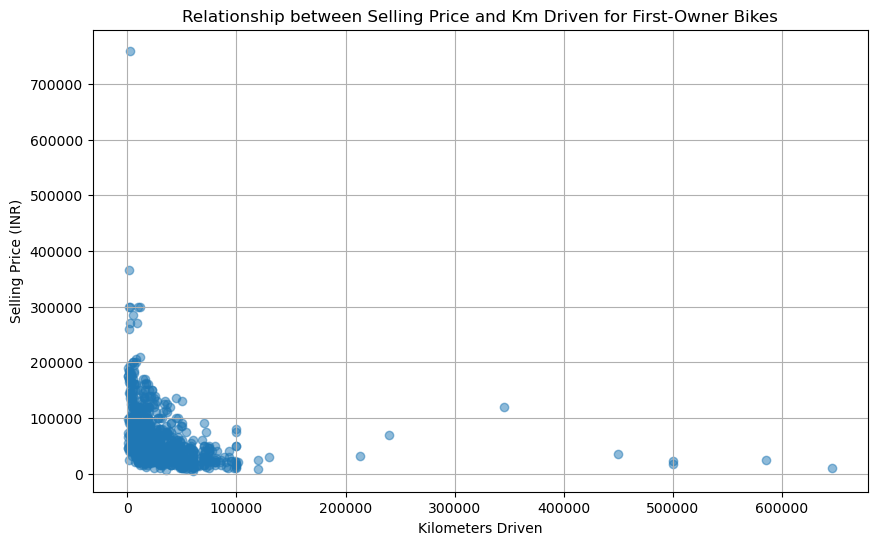

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(first_owner['km_driven'], first_owner['selling_price'], alpha=0.5)
plt.title('Relationship between Selling Price and Km Driven for First-Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price (INR)')
plt.grid(True)
plt.show()

#### 11.Identify and remove outliers in the km_driven column using the IQR method?

In [5]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]
print(f"Outliers in 'km_driven':\n{outliers}")

Outliers in 'km_driven':
                                 name  selling_price  year seller_type  \
91           Honda Activa [2000-2015]          22989  2012  Individual   
93                      Suzuki GS150R          30000  2010  Individual   
115           Hero Honda Passion Plus           7500  2004  Individual   
135            Hero Honda CBZ extreme          20000  2007  Individual   
154                Hero Xtreme Sports          22000  2014  Individual   
184              Honda CB Unicorn 160          75000  2015  Individual   
363                Hero Honda CD100SS          10000  1997  Individual   
470          Honda Activa [2000-2015]          23000  2009  Individual   
474     Hero Honda Passion PRO [2012]          12000  2012  Individual   
477          Honda Activa [2000-2015]          25000  2009  Individual   
511                Hero Splendor Plus          12000  2007  Individual   
535              Hero Honda CD Deluxe          12000  2007  Individual   
548          

In [7]:
df_cleaned = df[~((df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound))]
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

Original dataset shape: (1061, 7)
Cleaned dataset shape: (1022, 7)


#### 12. Perform a bivariate analysis to visualize the relationship between year and selling_price?

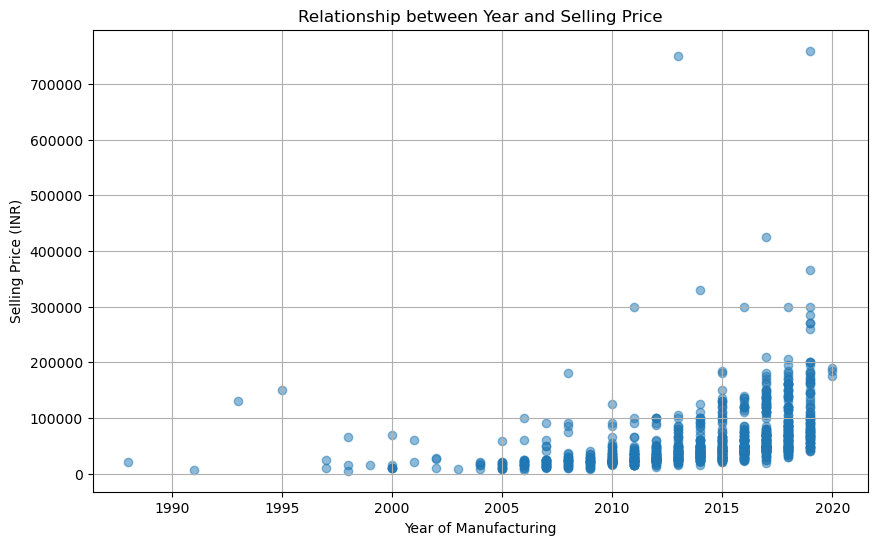

In [9]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['selling_price'], alpha=0.5)
plt.title('Relationship between Year and Selling Price')
plt.xlabel('Year of Manufacturing')
plt.ylabel('Selling Price (INR)')
plt.grid(True)
plt.show()

#### 13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

In [10]:
current_year = 2024  
df['age'] = current_year - df['year']
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']
avg_depreciation_by_age = df.groupby('age')['depreciation'].mean()
print(avg_depreciation_by_age)

age
4    -34260.000000
5      2954.562500
6     13023.194805
7     22306.082353
8     28328.190476
9     28013.275000
10    34505.606061
11    43086.886792
12    37317.648649
13    47102.666667
14    45658.928571
15    38227.785714
16    54732.428571
17    42399.000000
18    39664.500000
19    44852.000000
20    36852.000000
21             NaN
22             NaN
23    34852.000000
24             NaN
25             NaN
26             NaN
27             NaN
29             NaN
31             NaN
33             NaN
36             NaN
Name: depreciation, dtype: float64


#### 14.Which bike names are priced significantly above the average price for their manufacturing year?

In [3]:
avg_price_per_year = df.groupby('year')['selling_price'].mean()

In [4]:
df = df.merge(avg_price_per_year.rename('avg_selling_price'), on='year')
threshold = 1.2  
bikes_above_avg = df[df['selling_price'] > threshold * df['avg_selling_price']]
bike_names = bikes_above_avg['name'].tolist()
print("Bikes priced significantly above the average price for their manufacturing year:\n", bike_names)

Bikes priced significantly above the average price for their manufacturing year:
 ['Royal Enfield Classic 350', 'Royal Enfield Classic Gunmetal Grey', 'Royal Enfield Bullet 350 [2007-2011]', 'Yamaha YZF R3', 'Yamaha YZF R15 S', 'Royal Enfield Classic Gunmetal Grey', 'Yamaha FZ25', 'Jawa Standard', 'Royal Enfield Thunderbird 350', 'Honda CBR-250R', 'Royal Enfield Thunderbird 350', 'Bajaj Dominar 400', 'KTM 390 Duke', 'Yamaha FZ16', 'Royal Enfield Electra 5 S', 'Royal Enfield Bullet 350', 'Royal Enfield Thunderbird 350', 'Royal Enfield Electra 4 S', 'Mahindra Mojo XT300', 'Royal Enfield Thunderbird 350X', 'Hero Honda Karizma ZMR [2010]', 'Royal Enfield Thunderbird 350X', 'Royal Enfield Classic Gunmetal Grey', 'Yamaha FZ25', 'Royal Enfield Thunderbird 350X', 'Royal Enfield Classic Desert Storm', 'Yamaha FZ25', 'Royal Enfield Thunderbird 350', 'UM Renegade Commando', 'Royal Enfield Classic Gunmetal Grey', 'Royal Enfield Classic 350', 'Royal Enfield Continental GT 650', 'Harley-Davidson Str

#### 14.Develop a correlation matrix for numeric columns and visualize it using a heatmap?

In [3]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [4]:
correlation_matrix = numeric_df.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                    selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.918583
year                    0.402188  1.000000  -0.288675           0.126378
km_driven              -0.212937 -0.288675   1.000000          -0.122011
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000


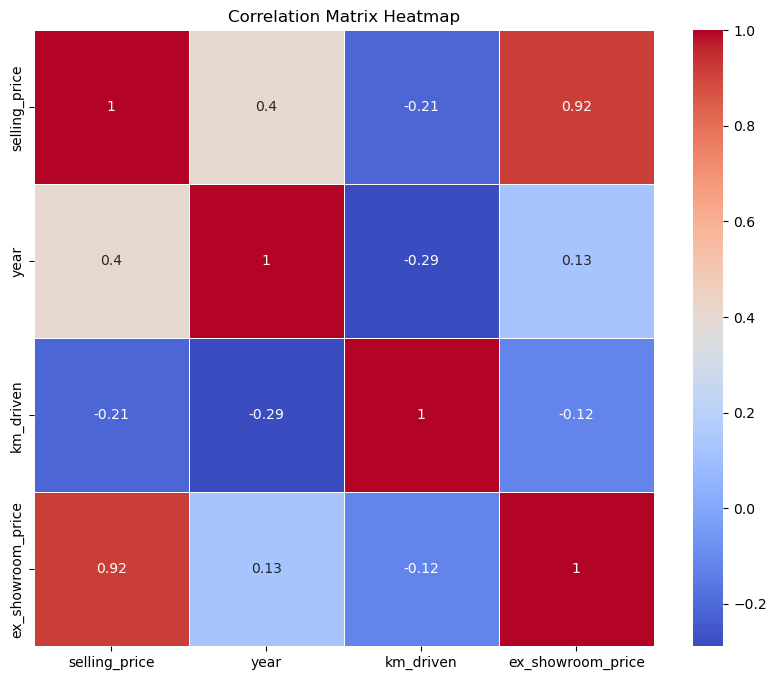

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## __EDA2(Car Sales Datasets)__

In [7]:
df=pd.read_csv('Car Sale.csv')

#### 1.What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [8]:
avg_selling_price_per_dealer = df.groupby('Dealer_Name')['Price ($)'].mean()
print("Average Selling Price for Each Dealer:\n", avg_selling_price_per_dealer)

Average Selling Price for Each Dealer:
 Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     2

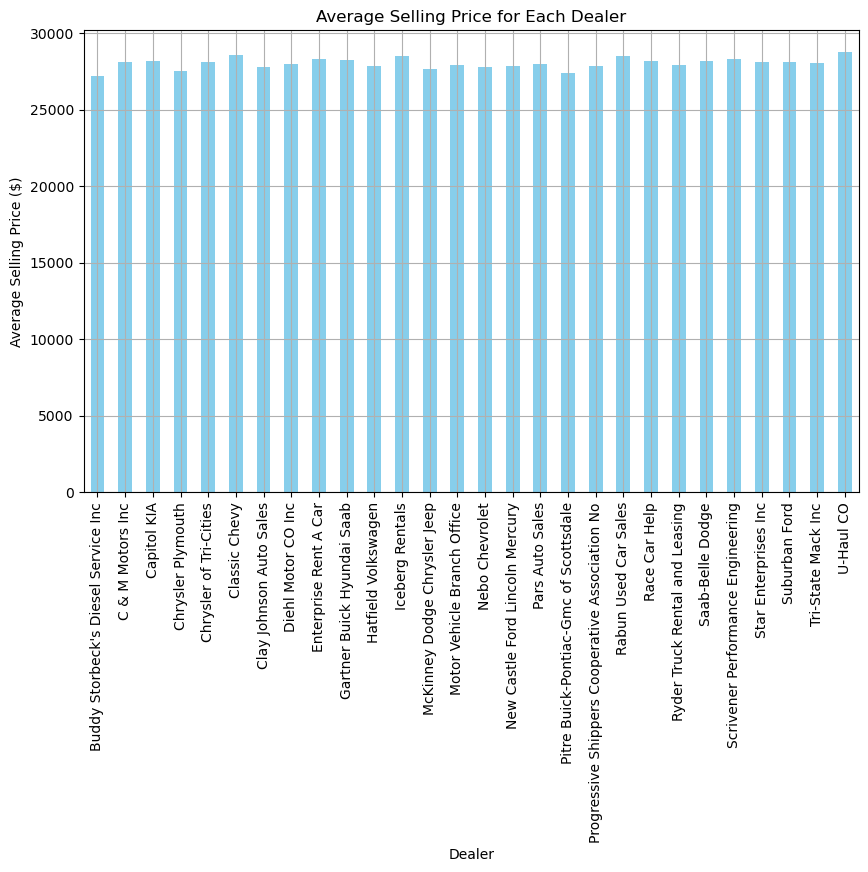

In [9]:
plt.figure(figsize=(10, 6))
avg_selling_price_per_dealer.plot(kind='bar', color='skyblue')
plt.title('Average Selling Price for Each Dealer')
plt.xlabel('Dealer')
plt.ylabel('Average Selling Price ($)')
plt.grid(True)
plt.show()

#### 2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

In [10]:
price_variation_per_brand = df.groupby('Company')['Price ($)'].std()

In [11]:
highest_variation_brand = price_variation_per_brand.idxmax()
highest_variation_value = price_variation_per_brand.max()
print(f"The car brand with the highest price variation is {highest_variation_brand} with a standard deviation of {highest_variation_value:.2f}")

The car brand with the highest price variation is Lincoln with a standard deviation of 19658.05


#### 3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

Interquartile Range for Each Transmission Type:
 Transmission
Auto      16500.0
Manual    17000.0
Name: Price ($), dtype: float64


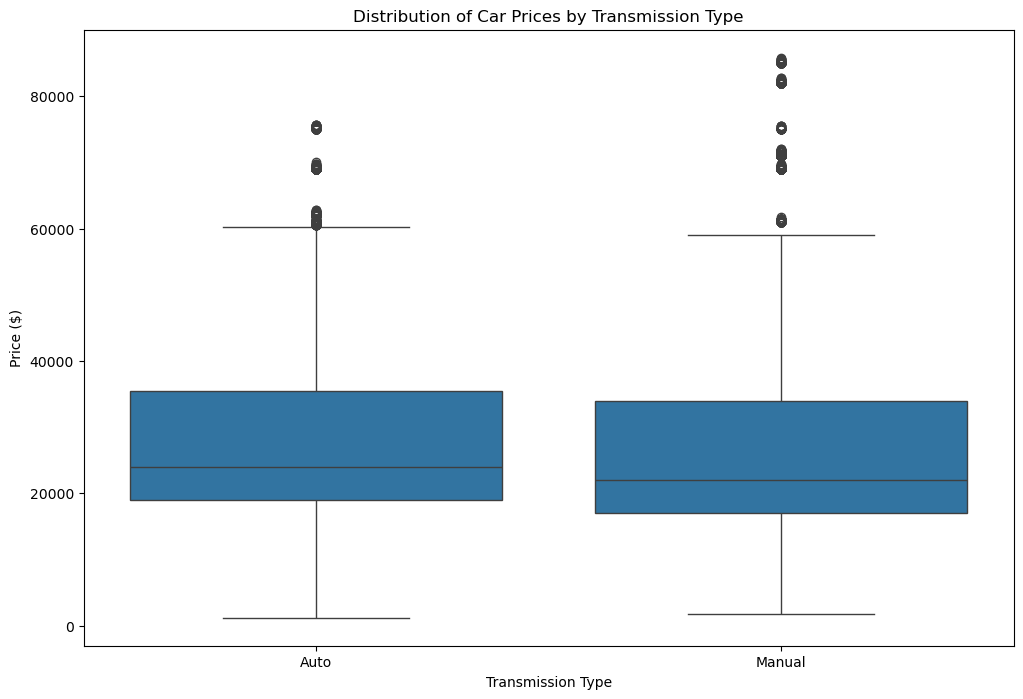

In [12]:
iqr_by_transmission = df.groupby('Transmission')['Price ($)'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
print("Interquartile Range for Each Transmission Type:\n", iqr_by_transmission)
plt.figure(figsize=(12, 8))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.show()

#### 4.What is the distribution of car prices across different regions?

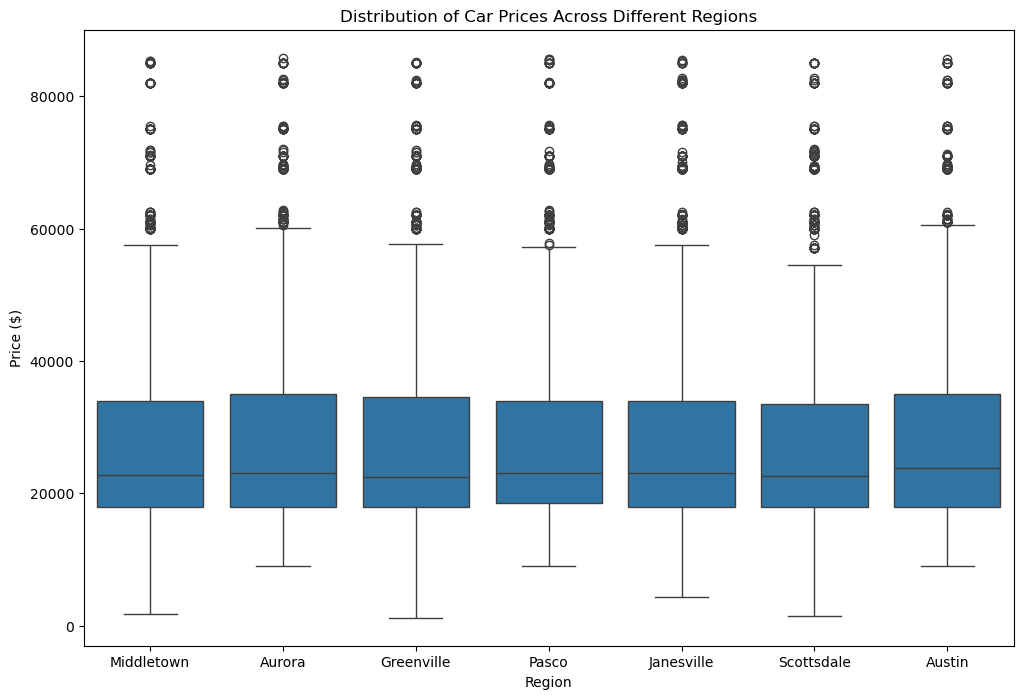

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Distribution of Car Prices Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.show()

#### 5.What is the distribution of cars based on body styles?

Distribution of Cars Based on Body Styles:
 Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


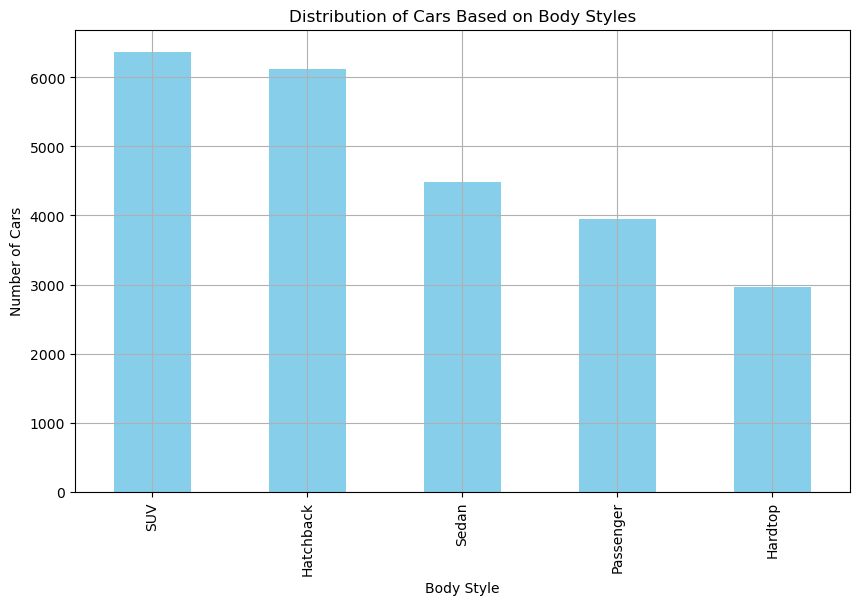

In [14]:
body_style_counts = df['Body Style'].value_counts()
print("Distribution of Cars Based on Body Styles:\n", body_style_counts)
plt.figure(figsize=(10, 6))
body_style_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Cars Based on Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()

#### 6.How does the average selling price of cars vary by customer gender and annual income?

In [16]:
avg_price_by_gender = df.groupby('Gender')['Price ($)'].mean()
print("Average Selling Price by Gender:\n", avg_price_by_gender)
income_bins = [0, 50000, 100000, 150000, 200000]
df['Income Group'] = pd.cut(df['Annual Income'], bins=income_bins, labels=['0-50k', '50-100k', '100-150k', '150-200k'])
avg_price_by_income = df.groupby('Income Group')['Price ($)'].mean()
print("Average Selling Price by Income Group:\n", avg_price_by_income)

Average Selling Price by Gender:
 Gender
Female    28277.265270
Male      28039.429407
Name: Price ($), dtype: float64
Average Selling Price by Income Group:
 Income Group
0-50k       27884.29782
50-100k     43000.00000
100-150k    23200.20000
150-200k    22650.40000
Name: Price ($), dtype: float64


C:\Users\abhis\AppData\Local\Temp\ipykernel_35032\2537510327.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income = df.groupby('Income Group')['Price ($)'].mean()


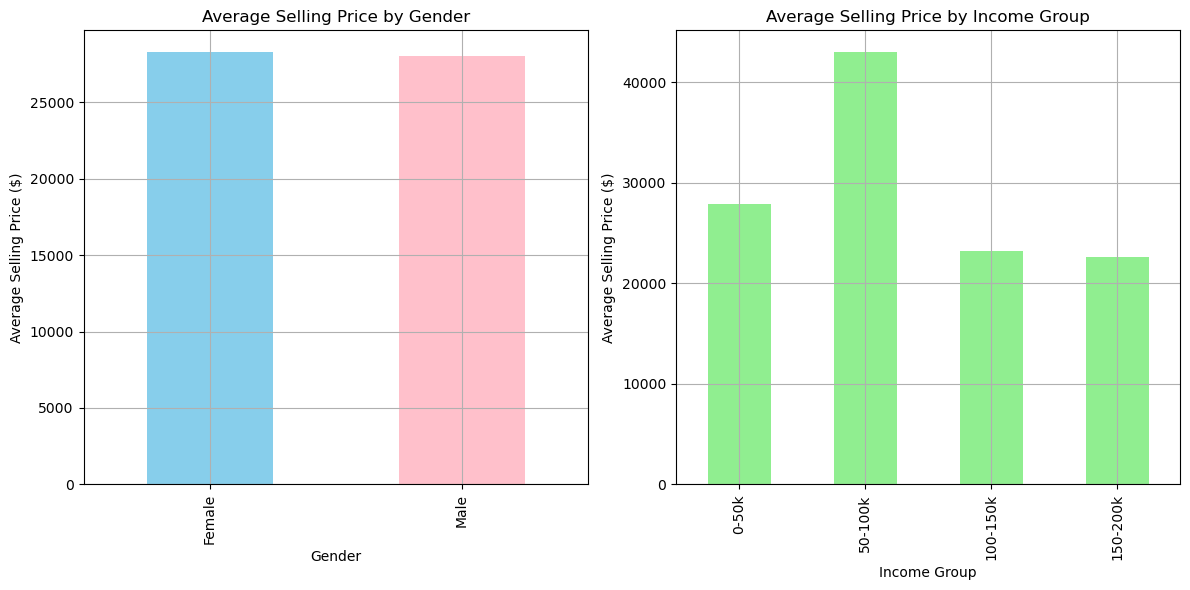

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
avg_price_by_gender.plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Average Selling Price by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Selling Price ($)')
plt.grid(True)
plt.subplot(1, 2, 2)
avg_price_by_income.plot(kind='bar', color='lightgreen')
plt.title('Average Selling Price by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Selling Price ($)')
plt.grid(True)

plt.tight_layout()
plt.show()

#### 7.What is the distribution of car prices by region, and how does the number of cars sold vary by region?

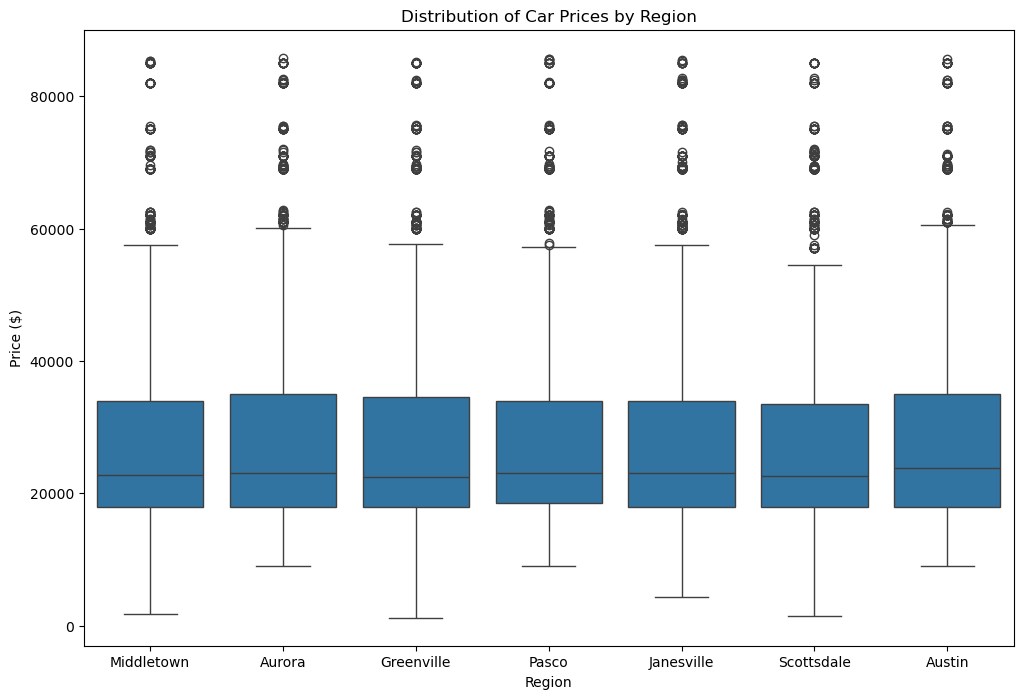

Number of Cars Sold by Region:
 Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Middletown    3128
Greenville    3128
Name: count, dtype: int64


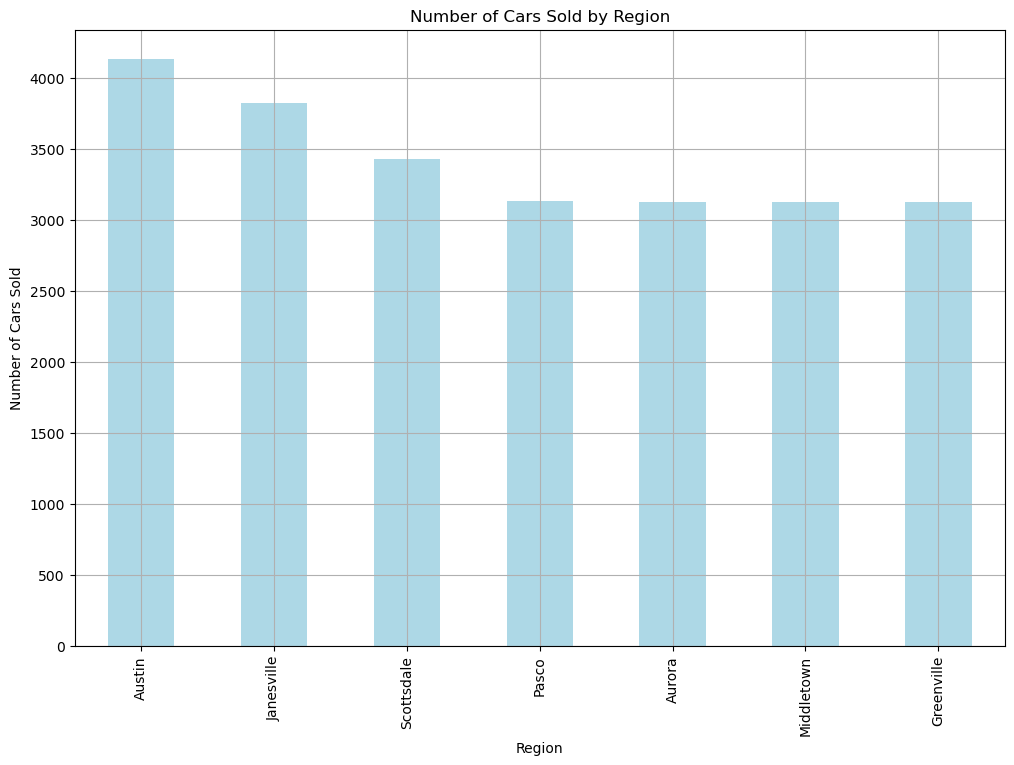

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.show()
cars_sold_by_region = df['Dealer_Region'].value_counts()
print("Number of Cars Sold by Region:\n", cars_sold_by_region)
plt.figure(figsize=(12, 8))
cars_sold_by_region.plot(kind='bar', color='lightblue')
plt.title('Number of Cars Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.grid(True)
plt.show()

#### 8.How does the average car price differ between cars with different engine sizes?

Average Car Price by Engine Size:
 Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


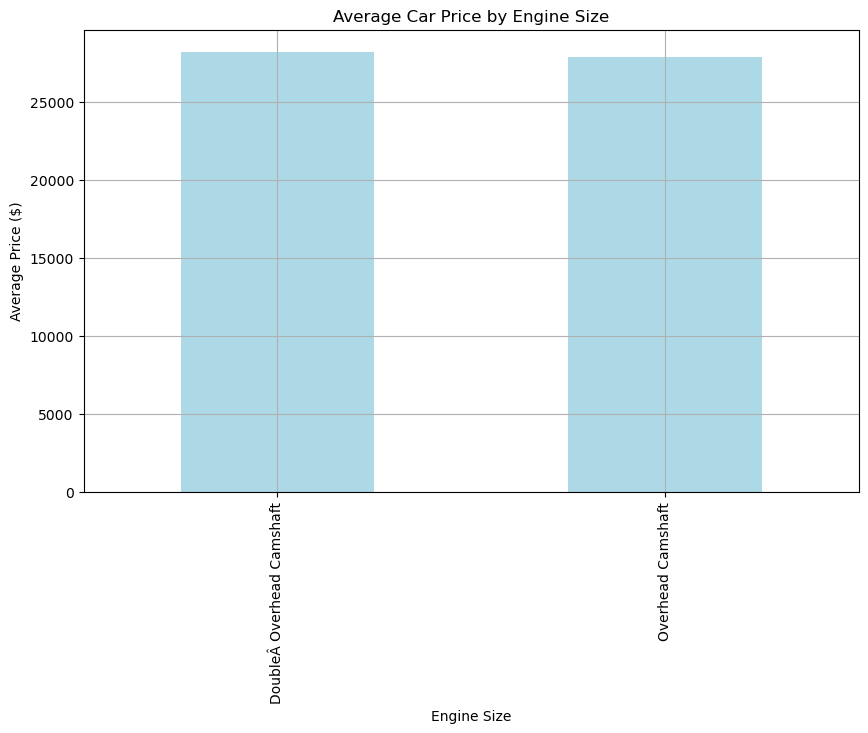

In [20]:
avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean()
print("Average Car Price by Engine Size:\n", avg_price_by_engine)
plt.figure(figsize=(10, 6))
avg_price_by_engine.plot(kind='bar', color='lightblue')
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()

#### 9.How do car prices vary based on the customer’s annual income bracket?

C:\Users\abhis\AppData\Local\Temp\ipykernel_35032\3686058141.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income_bracket = df.groupby('Income Bracket')['Price ($)'].mean()


Average Car Price by Income Bracket:
 Income Bracket
0-50k       27884.297820
50-100k     43000.000000
100-150k    23200.200000
150-200k    22650.400000
200-250k    32000.200000
250-300k    28466.195652
Name: Price ($), dtype: float64


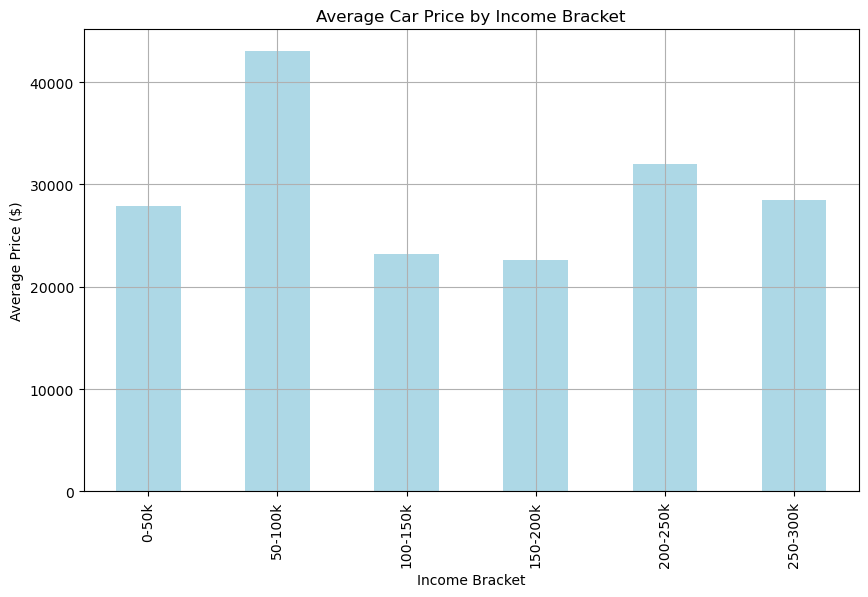

In [21]:
income_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000]
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=income_bins, labels=['0-50k', '50-100k', '100-150k', '150-200k', '200-250k', '250-300k'])
avg_price_by_income_bracket = df.groupby('Income Bracket')['Price ($)'].mean()
print("Average Car Price by Income Bracket:\n", avg_price_by_income_bracket)
plt.figure(figsize=(10, 6))
avg_price_by_income_bracket.plot(kind='bar', color='lightblue')
plt.title('Average Car Price by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()

#### 10.What are the top 5 car models with the highest number of sales, and how does their price distribution look?

Top 5 Car Models with the Highest Number of Sales:
 Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


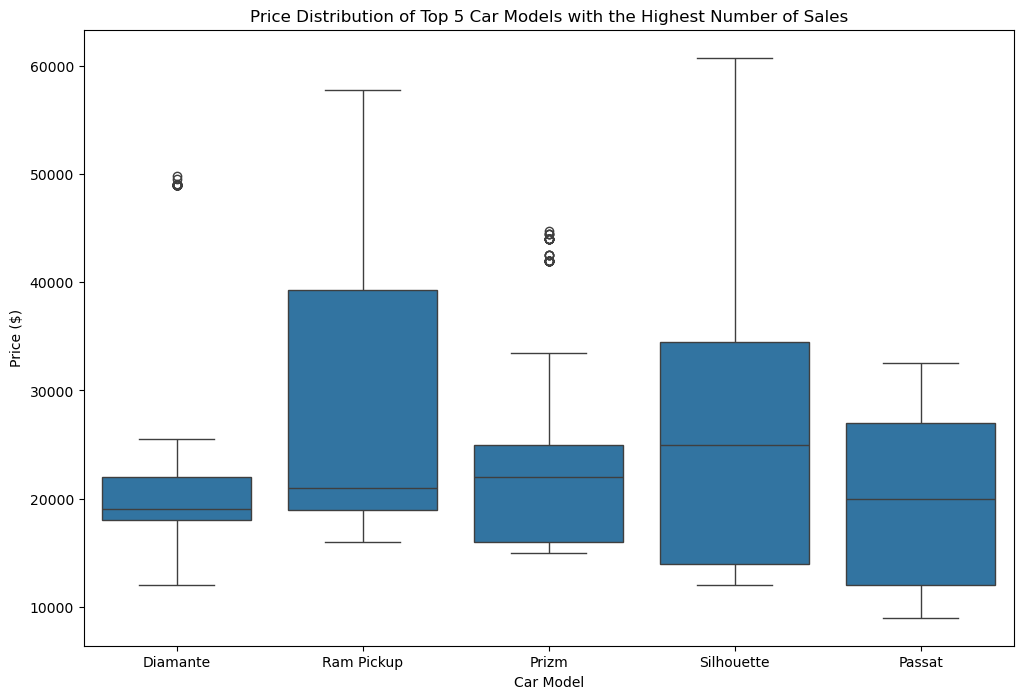

In [22]:
top_5_models = df['Model'].value_counts().head(5)
print("Top 5 Car Models with the Highest Number of Sales:\n", top_5_models)
top_5_models_list = top_5_models.index.tolist()
filtered_df = df[df['Model'].isin(top_5_models_list)]
plt.figure(figsize=(12, 8))
sns.boxplot(x='Model', y='Price ($)', data=filtered_df)
plt.title('Price Distribution of Top 5 Car Models with the Highest Number of Sales')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.show()

#### 11.How does car price vary with engine size across different car colors, and which colors have the highest price variation?

Average Car Price by Engine Size and Color:
 Color                             Black    Pale White           Red
Engine                                                             
DoubleÂ Overhead Camshaft  25766.451103  30347.987460  27434.392314
Overhead Camshaft          31732.967164  24327.767694  30153.405229
Price Variation by Car Color:
 Color
Black         15286.065976
Pale White    14077.346859
Red           15519.360962
Name: Price ($), dtype: float64
The car color with the highest price variation is Red with a standard deviation of 15519.36


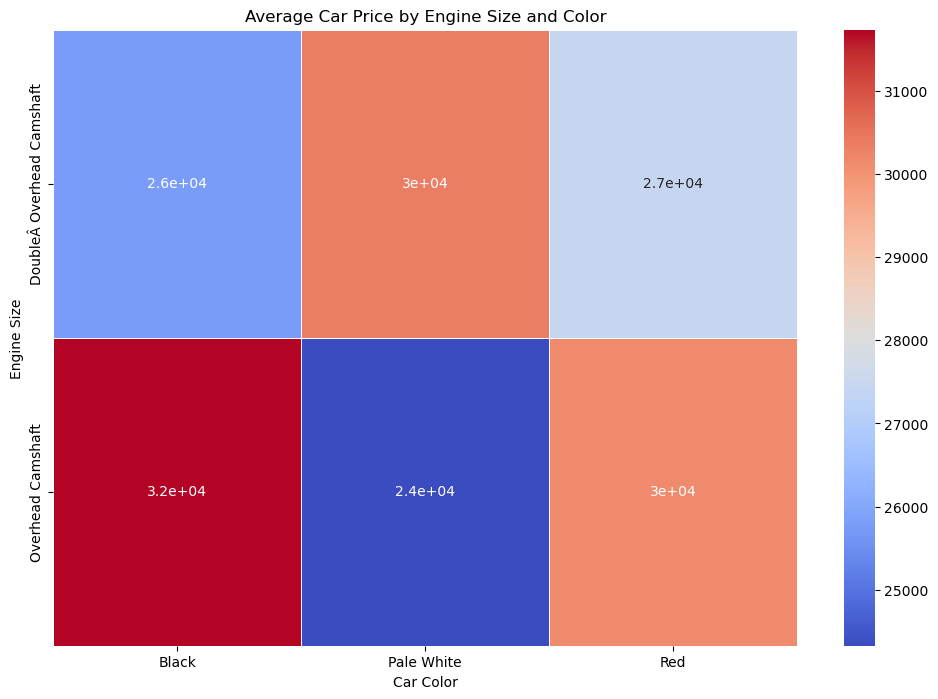

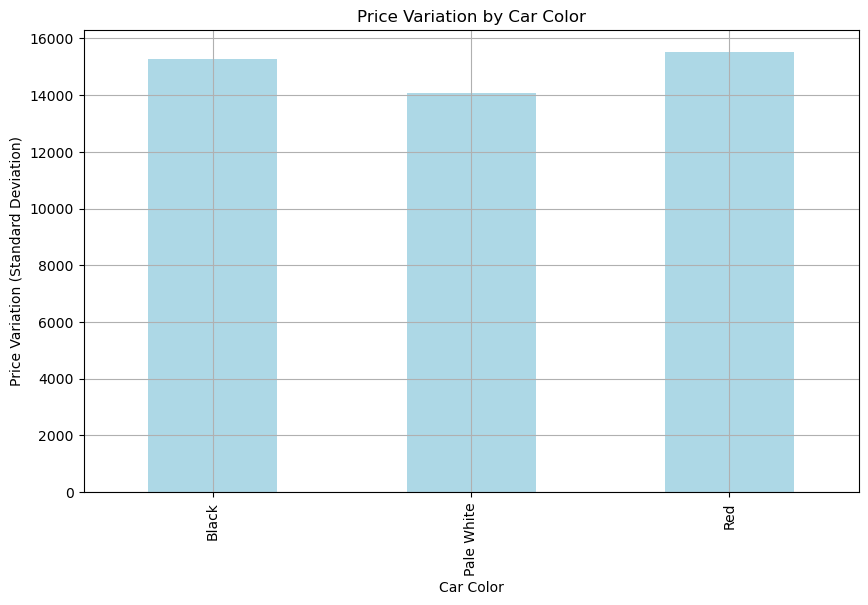

In [23]:
avg_price_by_engine_color = df.groupby(['Engine', 'Color'])['Price ($)'].mean().unstack()
print("Average Car Price by Engine Size and Color:\n", avg_price_by_engine_color)
price_variation_by_color = df.groupby('Color')['Price ($)'].std()
print("Price Variation by Car Color:\n", price_variation_by_color)
highest_variation_color = price_variation_by_color.idxmax()
highest_variation_value = price_variation_by_color.max()
print(f"The car color with the highest price variation is {highest_variation_color} with a standard deviation of {highest_variation_value:.2f}")
plt.figure(figsize=(12, 8))
sns.heatmap(avg_price_by_engine_color, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Average Car Price by Engine Size and Color')
plt.xlabel('Car Color')
plt.ylabel('Engine Size')
plt.show()
plt.figure(figsize=(10, 6))
price_variation_by_color.plot(kind='bar', color='lightblue')
plt.title('Price Variation by Car Color')
plt.xlabel('Car Color')
plt.ylabel('Price Variation (Standard Deviation)')
plt.grid(True)
plt.show()

#### 12.Is there any seasonal trend in car sales based on the date of sale?

Number of Car Sales for Each Month:
 Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: Car_id, dtype: int64


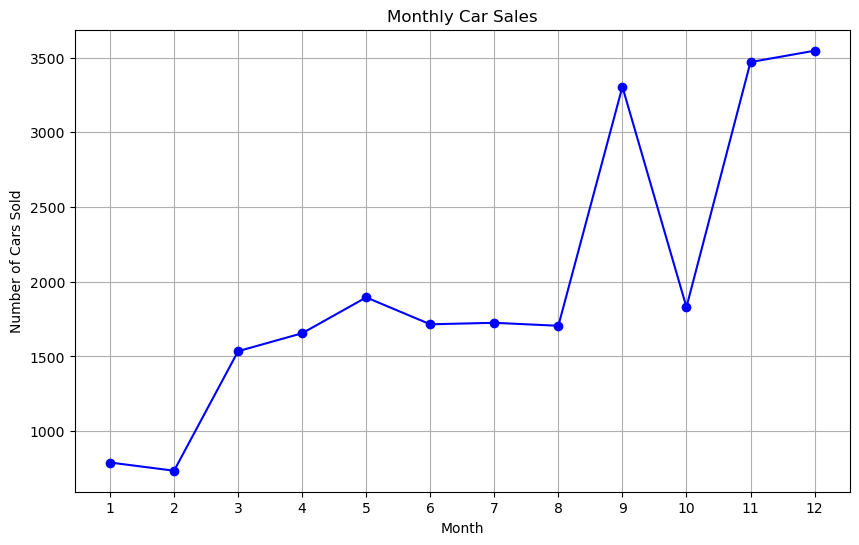

In [24]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
monthly_sales = df.groupby('Month')['Car_id'].count()
print("Number of Car Sales for Each Month:\n", monthly_sales)
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Car Sales')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

#### 13.How does the car price distribution change when considering different combinations of body style and transmission type?

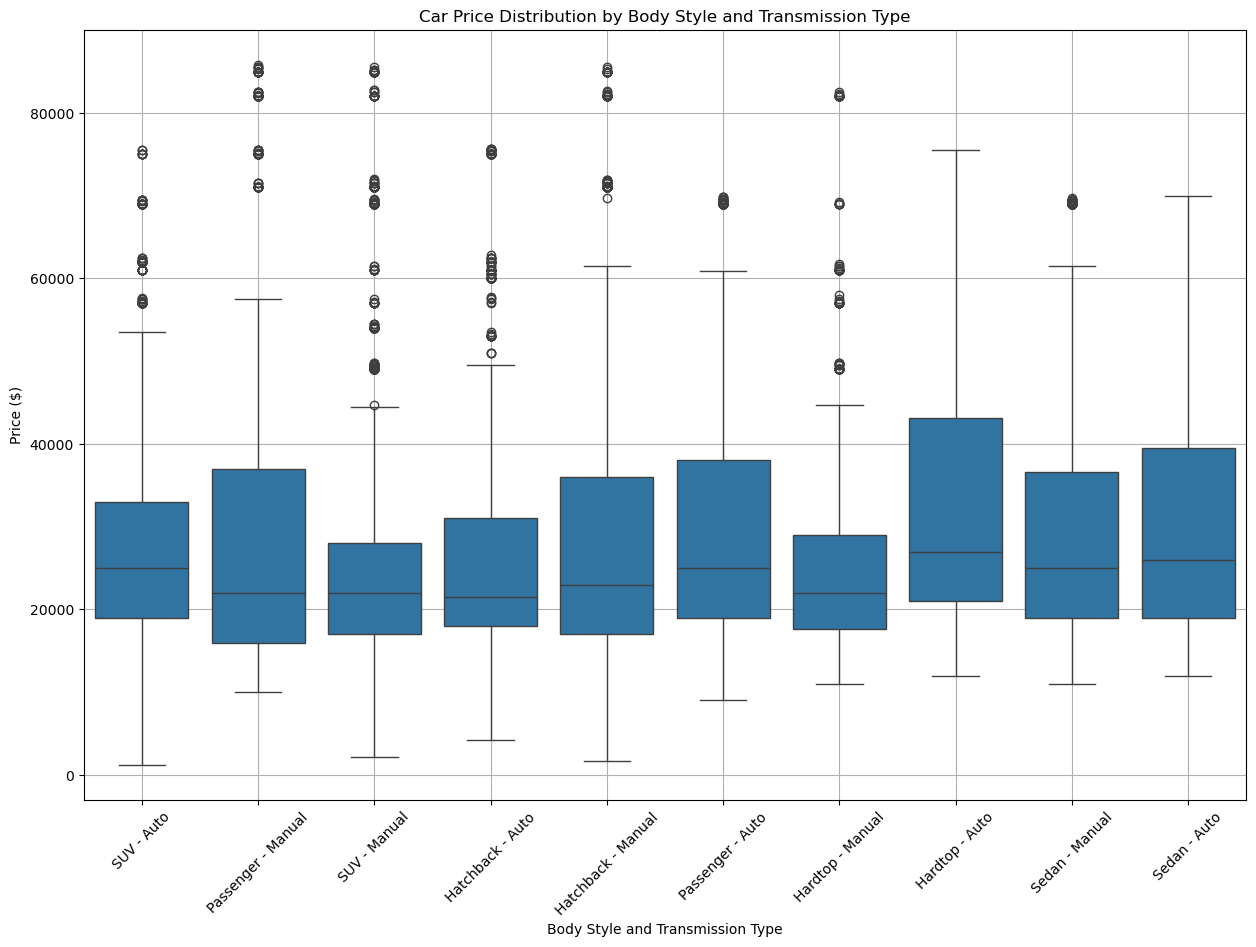

In [25]:
df['Body_Transmission'] = df['Body Style'] + ' - ' + df['Transmission']
plt.figure(figsize=(15, 10))
sns.boxplot(x='Body_Transmission', y='Price ($)', data=df)
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style and Transmission Type')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### 14.What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

Correlation Matrix:
                Price ($)  Engine_Size  Annual Income
Price ($)       1.000000    -0.011271       0.012065
Engine_Size    -0.011271     1.000000      -0.006598
Annual Income   0.012065    -0.006598       1.000000


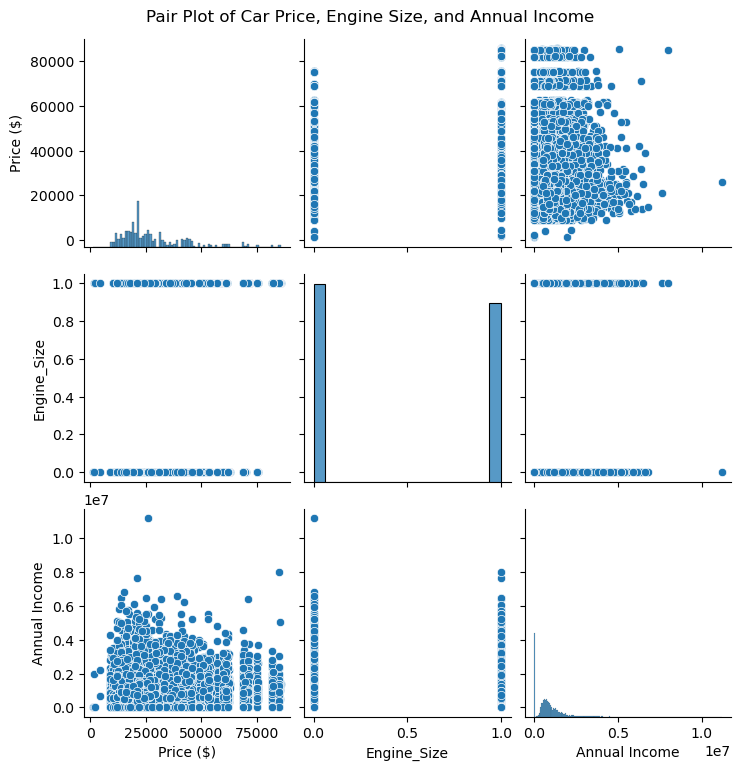

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Engine_Size'] = le.fit_transform(df['Engine'])
selected_columns = df[['Price ($)', 'Engine_Size', 'Annual Income']]
correlation_matrix = selected_columns.corr()
print("Correlation Matrix:\n", correlation_matrix)
sns.pairplot(selected_columns)
plt.suptitle('Pair Plot of Car Price, Engine Size, and Annual Income', y=1.02)
plt.show()

#### 15.How does the average car price vary across different car models and engine types?

Average Car Price by Car Model and Engine Type:
 Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37986.380117                NaN
3000GT                 22764.326923       21770.659864
300M                   21394.888889                NaN
323i                   16744.632287       21038.162162
328i                   21069.149606       38676.177215
...                             ...                ...
Viper                  32118.479167       26052.375000
Voyager                22066.026316       33995.678322
Windstar               25145.636364       17100.272727
Wrangler               21145.294737       18742.942029
Xterra                 15940.459459       31072.500000

[154 rows x 2 columns]


<Figure size 1500x1000 with 0 Axes>

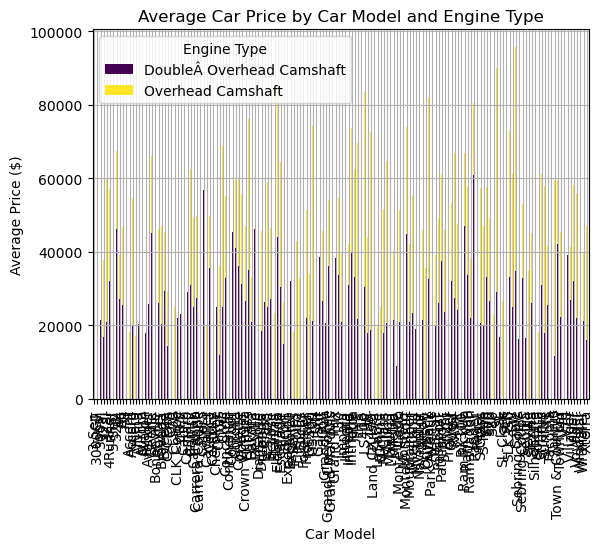

In [28]:
avg_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()
print("Average Car Price by Car Model and Engine Type:\n", avg_price_by_model_engine)
plt.figure(figsize=(15, 10))
avg_price_by_model_engine.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Average Car Price by Car Model and Engine Type')
plt.xlabel('Car Model')
plt.ylabel('Average Price ($)')
plt.legend(title='Engine Type')
plt.grid(True)
plt.show()

## __EDA2(Amazon Sales Data)__

In [38]:
df=pd.read_csv('Amazon.csv')

#### 1.What is the average rating for each product category?

In [39]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
avg_rating_by_category = df.groupby('category')['rating'].mean()
print("Average Rating for Each Product Category:\n", avg_rating_by_category)

Average Rating for Each Product Category:
 category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProdu

#### 2.What are the top rating_count products by category?

In [40]:
top_rated_by_category = df.loc[df.groupby('category')['rating_count'].idxmax()]
print("Top-Rated Products by Category Based on Rating Count:\n", top_rated_by_category[['category', 'product_name', 'rating', 'rating_count']])

Top-Rated Products by Category Based on Rating Count:
                                                category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
772   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
993   OfficeProducts|OfficePaperProducts|Paper|Stati...   
765   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name  rating rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...     3.8        1,118  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...     4.3        4,426  

#### 3.What is the distribution of discounted prices vs. actual prices?

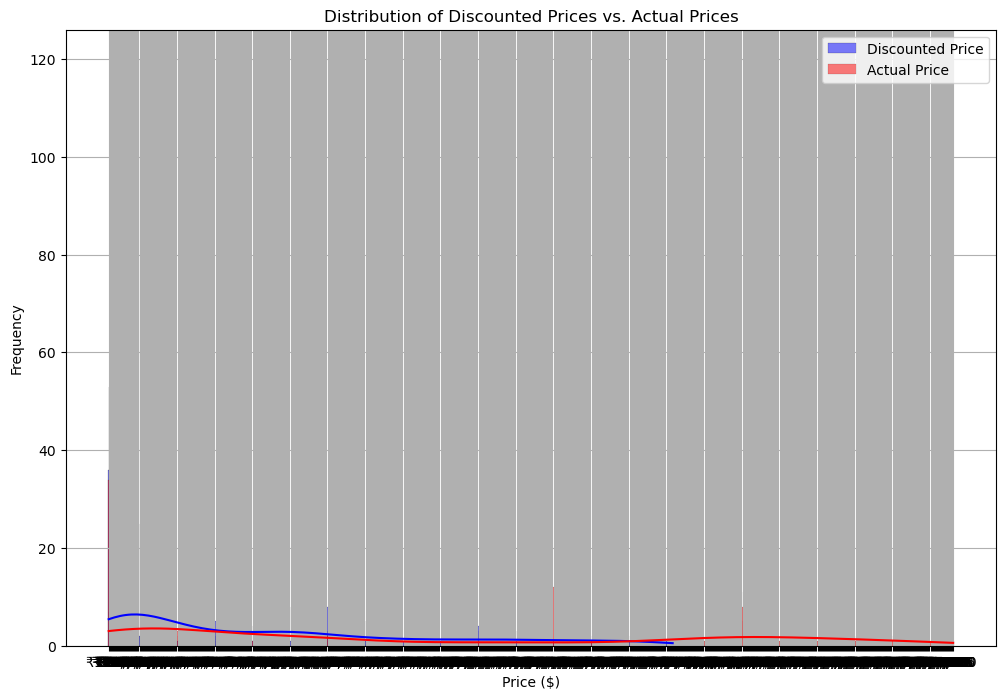

In [42]:
plt.figure(figsize=(12, 8))
sns.histplot(df['discounted_price'], kde=True, color='blue', label='Discounted Price', bins=30)
sns.histplot(df['actual_price'], kde=True, color='red', label='Actual Price', bins=30)
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

#### 4.How does the average discount percentage vary across categories?

Average Discount Percentage for Each Product Category:
 category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                   NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                  NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                          NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                       NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                          NaN
                                                                                                                          ..
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens       NaN
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pen

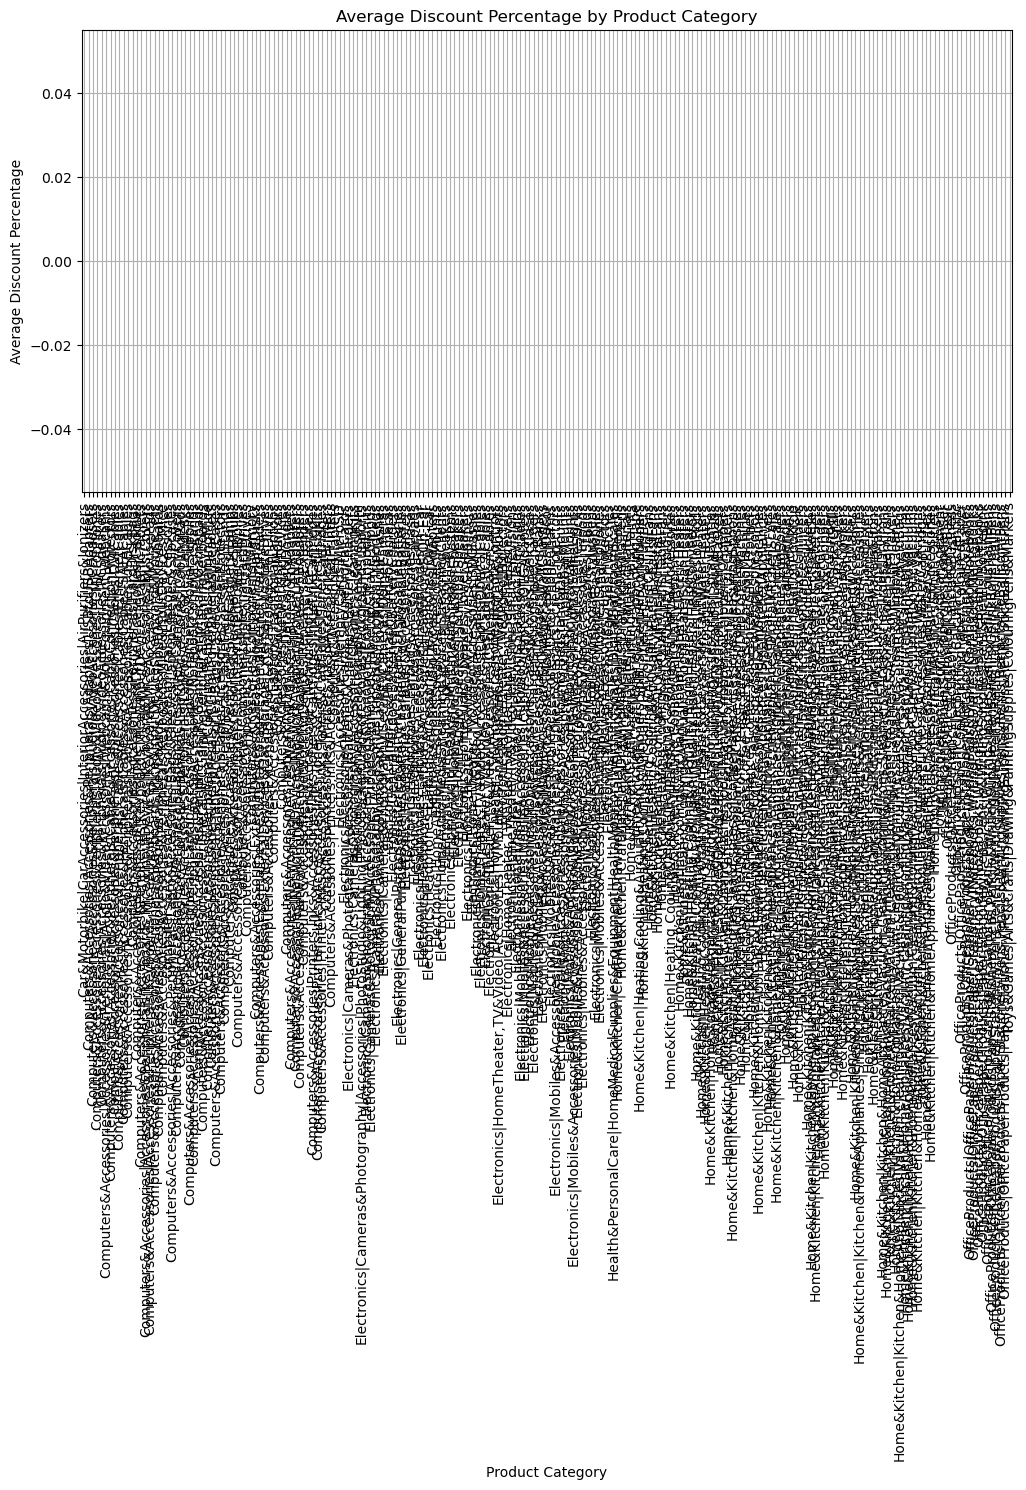

In [45]:
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')
avg_discount_by_category = df.groupby('category')['discount_percentage'].mean()
print("Average Discount Percentage for Each Product Category:\n", avg_discount_by_category)
plt.figure(figsize=(12, 6))
avg_discount_by_category.plot(kind='bar', color='lightblue')
plt.title('Average Discount Percentage by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Discount Percentage')
plt.grid(True)
plt.show()

#### 5. What are the most popular product names?

In [46]:
most_popular_products = df.sort_values(by='rating_count', ascending=False)
top_n_products = most_popular_products[['product_name', 'rating_count']].head(10)
print("Most Popular Product Names Based on Rating Count:\n", top_n_products)

Most Popular Product Names Based on Rating Count:
                                            product_name rating_count
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...          992
750        Eveready Red 1012 AAA Batteries - Pack of 10          989
977   Sennheiser CX 80S in-Ear Wired Headphones with...       98,250
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...          976
151   Zoul USB Type C Fast Charging 3A Nylon Braided...          974
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...          974
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...          974
536   boAt Rockerz 400 Bluetooth On Ear Headphones W...       97,175
918   boAt Rockerz 400 Bluetooth On Ear Headphones W...       97,174
1165  Kitchenwell 18Pc Plastic Food Snack Bag Pouch ...           97


#### 6.What are the most popular product keywords?

In [47]:
df['combined_text'] = df['about_product'].astype(str) + ' ' + df['review_title'].astype(str) + ' ' + df['review_content'].astype(str)
from collections import Counter
import re
def tokenize(text):
    text = re.sub(r'\W+', ' ', text)
    tokens = text.lower().split()
    return tokens
all_words = []
df['combined_text'].apply(lambda x: all_words.extend(tokenize(x)))
word_freq = Counter(all_words)
most_common_keywords = word_freq.most_common(10)
print("Most Popular Product Keywords:\n", most_common_keywords)

Most Popular Product Keywords:
 [('the', 19342), ('and', 15566), ('to', 12373), ('is', 12322), ('it', 11760), ('for', 10635), ('good', 10451), ('a', 8698), ('i', 7723), ('of', 6941)]


#### 7.What are the most popular product reviews?

In [48]:
most_popular_reviews = df.sort_values(by='rating_count', ascending=False)
top_n_reviews = most_popular_reviews[['product_name', 'review_title', 'review_content', 'rating', 'rating_count']].head(10)
print("Most Popular Product Reviews:\n", top_n_reviews)

Most Popular Product Reviews:
                                            product_name  \
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...   
750        Eveready Red 1012 AAA Batteries - Pack of 10   
977   Sennheiser CX 80S in-Ear Wired Headphones with...   
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...   
151   Zoul USB Type C Fast Charging 3A Nylon Braided...   
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
536   boAt Rockerz 400 Bluetooth On Ear Headphones W...   
918   boAt Rockerz 400 Bluetooth On Ear Headphones W...   
1165  Kitchenwell 18Pc Plastic Food Snack Bag Pouch ...   

                                           review_title  \
1279  Decent product,doesn't pick up sand,Ok ok,Must...   
750   Nice .,very good batteries received,Longtevity...   
977   A Quality Sound-Signature but leaves craving f...   
1059  Kettle is good but bottle is not good quality,...   
151   Great Cable, Charg

#### 8.What is the correlation between discounted_price and rating?

Correlation between Discounted Price and Rating: nan


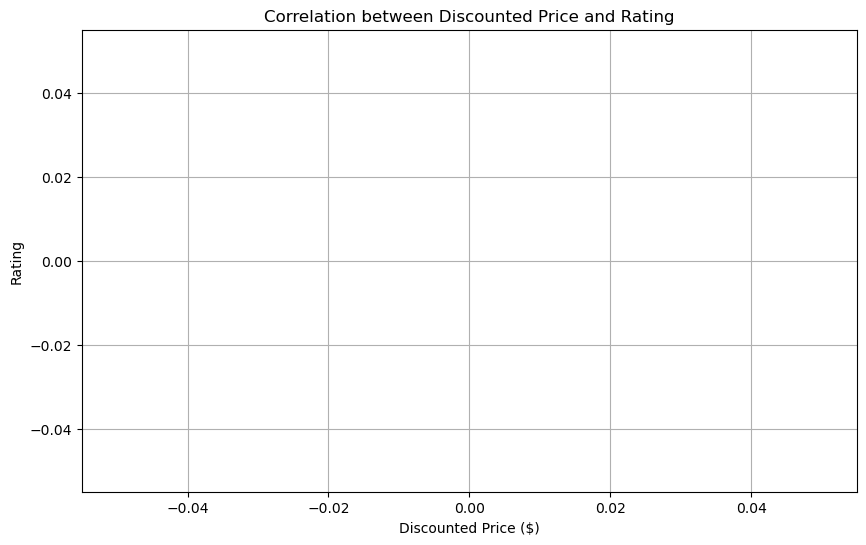

In [49]:
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
correlation = df['discounted_price'].corr(df['rating'])
print("Correlation between Discounted Price and Rating:", correlation)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discounted_price', y='rating', data=df)
plt.title('Correlation between Discounted Price and Rating')
plt.xlabel('Discounted Price ($)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

#### 9. What are the Top 5 categories based on the highest ratings?

In [50]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
avg_rating_by_category = df.groupby('category')['rating'].mean()
top_5_categories = avg_rating_by_category.sort_values(ascending=False).head(5)
print("Top 5 Categories Based on Highest Ratings:\n", top_5_categories)

Top 5 Categories Based on Highest Ratings:
 category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64


#### 10.Identify any potential areas for improvement or optimization based on the data analysis

some potential areas for improvement or optimization:

### 1. Product Pricing Strategy
- **High Discount, Low Rating**: Identify products that have high discounts but low ratings. This could indicate that customers may be dissatisfied even with the discounted price, suggesting a need to review the product quality or pricing strategy.
- **Category-Specific Discounts**: Analyze which categories offer higher discounts on average. If a particular category is consistently offering high discounts, it might indicate overstock or less demand, which can be further investigated.

### 2. Inventory Management
- **Top-Rated Products**: Ensure that top-rated products are always in stock. These products likely have high demand, and ensuring their availability can lead to increased sales and customer satisfaction.
- **Sales Trends**: Analyze the seasonal trends in car sales based on the date of sale. If certain products have seasonal peaks, ensure adequate inventory leading up to those periods.

### 3. Product Improvement
- **Low-Rated Products**: Identify products with low ratings and read through the reviews to understand common issues. This feedback can be used for product improvement or to inform customers better about the product's features and limitations.
- **Feature Analysis**: Compare products across categories and identify features that are common in highly-rated products. This insight can be used to improve other products in similar categories.

### 4. Marketing and Promotion
- **Popular Keywords**: Utilize the most popular product keywords in your marketing campaigns to attract more customers. These keywords resonate with customers and are often used in reviews and descriptions.
- **Review Highlights**: Highlight positive reviews and ratings in your marketing materials to build trust and credibility among potential customers.

### 5. Customer Satisfaction
- **Respond to Reviews**: Actively respond to customer reviews, especially negative ones, to show that you care about their feedback and are willing to make improvements.
- **Encourage Reviews**: Encourage customers to leave reviews after their purchase. Products with higher rating counts tend to appear more popular and trustworthy.

## __EDA4(Spotify Data:Popular Hip_Hop Artists and Track)__

In [3]:
df=pd.read_csv('spotify.csv')

#### 1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

In [6]:
# Check for null values
null_values = df.isnull().sum()
print("Null Values in Each Column:\n", null_values)
df = df.dropna()
null_values_after = df.isnull().sum()
print("Null Values After Handling:\n", null_values_after)
duplicate_rows = df.duplicated().sum()
print("Number of Duplicate Rows:", duplicate_rows)
df = df.drop_duplicates()
duplicate_rows_after = df.duplicated().sum()
print("Number of Duplicate Rows After Handling:", duplicate_rows_after)

Null Values in Each Column:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Null Values After Handling:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Number of Duplicate Rows: 0
Number of Duplicate Rows After Handling: 0


#### 2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

Column Names in the Dataset:
 Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')


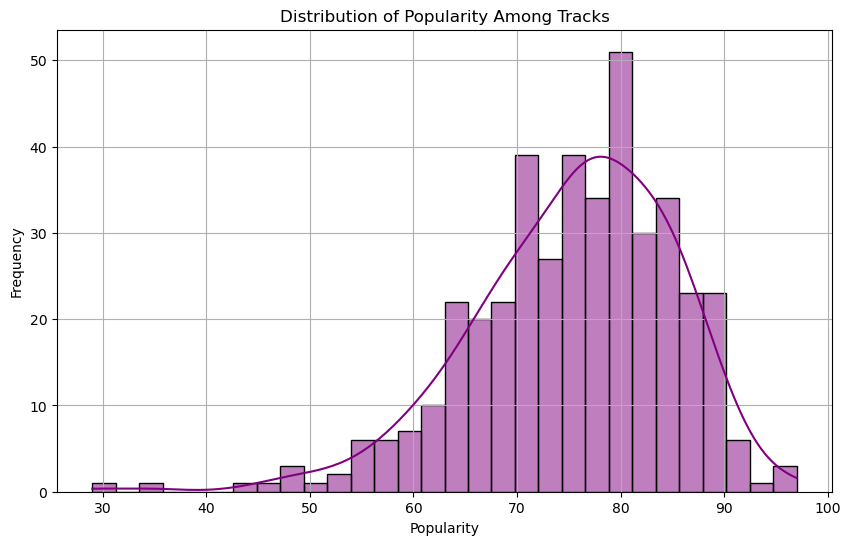

In [13]:
print("Column Names in the Dataset:\n", df.columns)
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=30, kde=True, color='purple')
plt.title('Distribution of Popularity Among Tracks')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### 3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?

Column Names in the Dataset:
 Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')


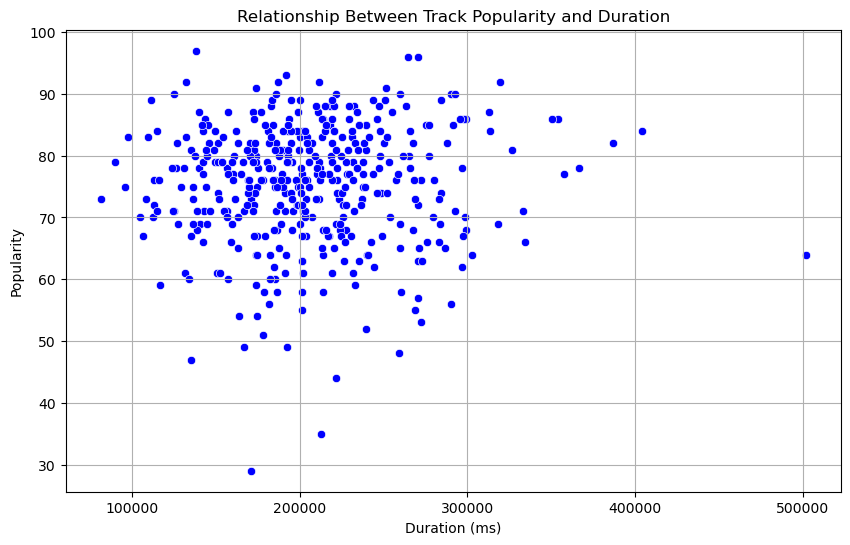

In [14]:
print("Column Names in the Dataset:\n", df.columns)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df, color='blue')
plt.title('Relationship Between Track Popularity and Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

#### 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

Column Names in the Dataset:
 Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')
Artist with the Highest Number of Tracks:
 Artist
Drake    17
Name: count, dtype: int64


C:\Users\abhis\AppData\Local\Temp\ipykernel_47420\2506720051.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Artist', data=df, order=df['Artist'].value_counts().index, palette='viridis')


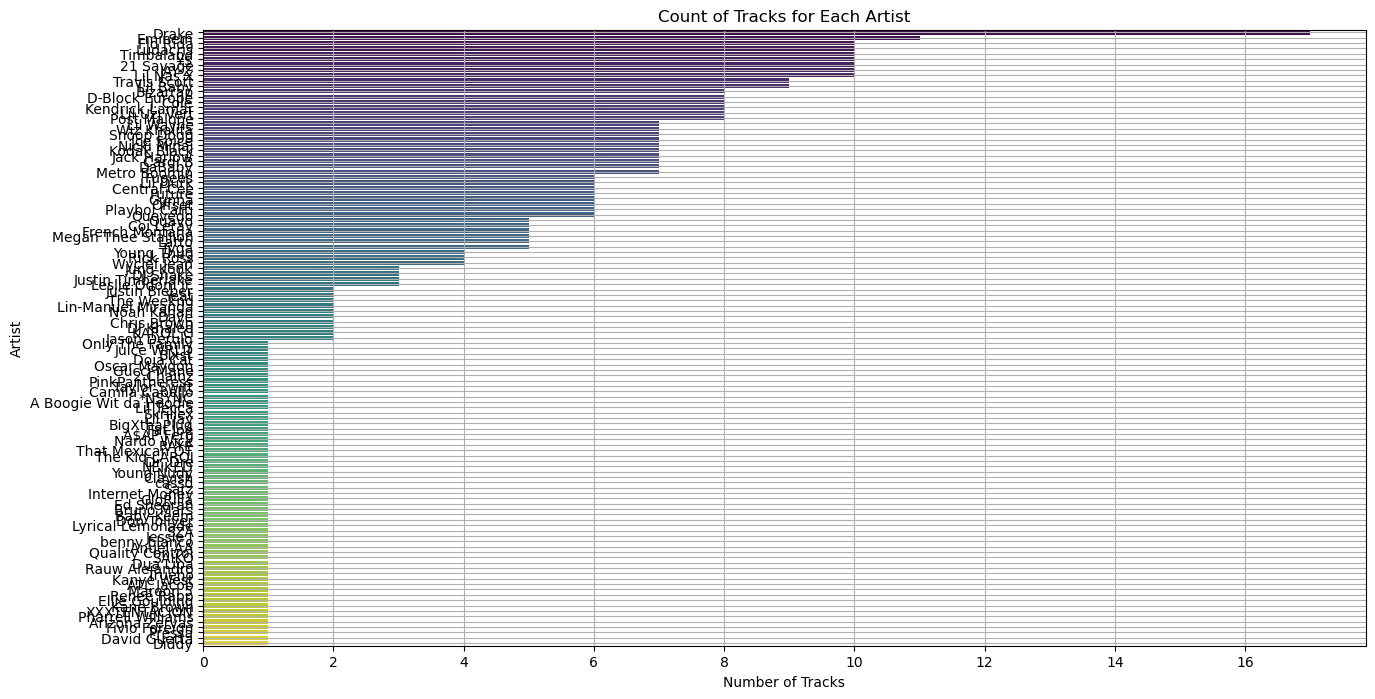

In [15]:
print("Column Names in the Dataset:\n", df.columns)
track_counts = df['Artist'].value_counts()
print("Artist with the Highest Number of Tracks:\n", track_counts.head(1))
plt.figure(figsize=(15, 8))
sns.countplot(y='Artist', data=df, order=df['Artist'].value_counts().index, palette='viridis')
plt.title('Count of Tracks for Each Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.grid(True)
plt.show()

#### 5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?

In [16]:
sorted_df = df.sort_values(by='Popularity', ascending=True)
least_popular_tracks = sorted_df[['Artist', 'Track Name', 'Popularity']].head(5)
print("Top 5 Least Popular Tracks:\n", least_popular_tracks)

Top 5 Least Popular Tracks:
              Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


#### 6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

In [17]:
print("Column Names in the Dataset:\n", df.columns)
average_popularity_per_artist = df.groupby('Artist')['Popularity'].mean()
top_5_artists = average_popularity_per_artist.sort_values(ascending=False).head(5)
print("Top 5 Most Popular Artists by Average Popularity:\n", top_5_artists)

Column Names in the Dataset:
 Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')
Top 5 Most Popular Artists by Average Popularity:
 Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


#### 7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist?

In [18]:
average_popularity_per_artist = df.groupby('Artist')['Popularity'].mean()
top_5_artists = average_popularity_per_artist.sort_values(ascending=False).head(5)
print("Top 5 Most Popular Artists by Average Popularity:\n", top_5_artists)
most_popular_tracks = []
for artist in top_5_artists.index:
    artist_df = df[df['Artist'] == artist]
    most_popular_track = artist_df.loc[artist_df['Popularity'].idxmax()]['Track Name']
    most_popular_tracks.append({'Artist': artist, 'Track Name': most_popular_track})
most_popular_tracks_df = pd.DataFrame(most_popular_tracks)
print("Most Popular Tracks for the Top 5 Most Popular Artists:\n", most_popular_tracks_df)

Top 5 Most Popular Artists by Average Popularity:
 Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64
Most Popular Tracks for the Top 5 Most Popular Artists:
          Artist                    Track Name
0         cassö                         Prada
1        Trueno  Mamichula - con Nicki Nicole
2  David Guetta            Baby Don't Hurt Me
3  Travis Scott    FE!N (feat. Playboi Carti)
4            ¥$                      CARNIVAL


#### 8.Visualize relationships between multiple numerical variables simultaneously using a pair plot?

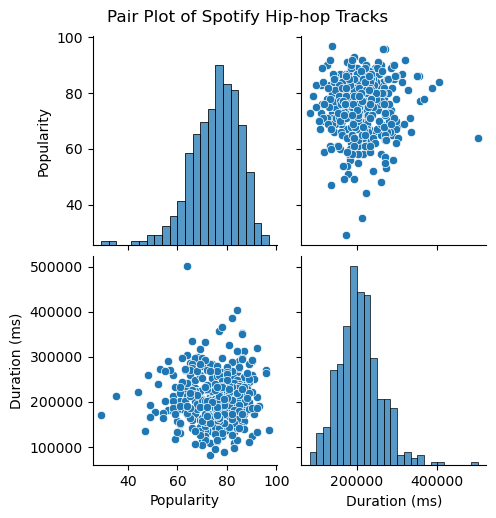

In [19]:
numerical_columns = ['Popularity', 'Duration (ms)']
sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Spotify Hip-hop Tracks', y=1.02)
plt.show()

#### 9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot?

C:\Users\abhis\AppData\Local\Temp\ipykernel_47420\1140995106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Artist', y='Duration (ms)', data=df, palette='viridis')


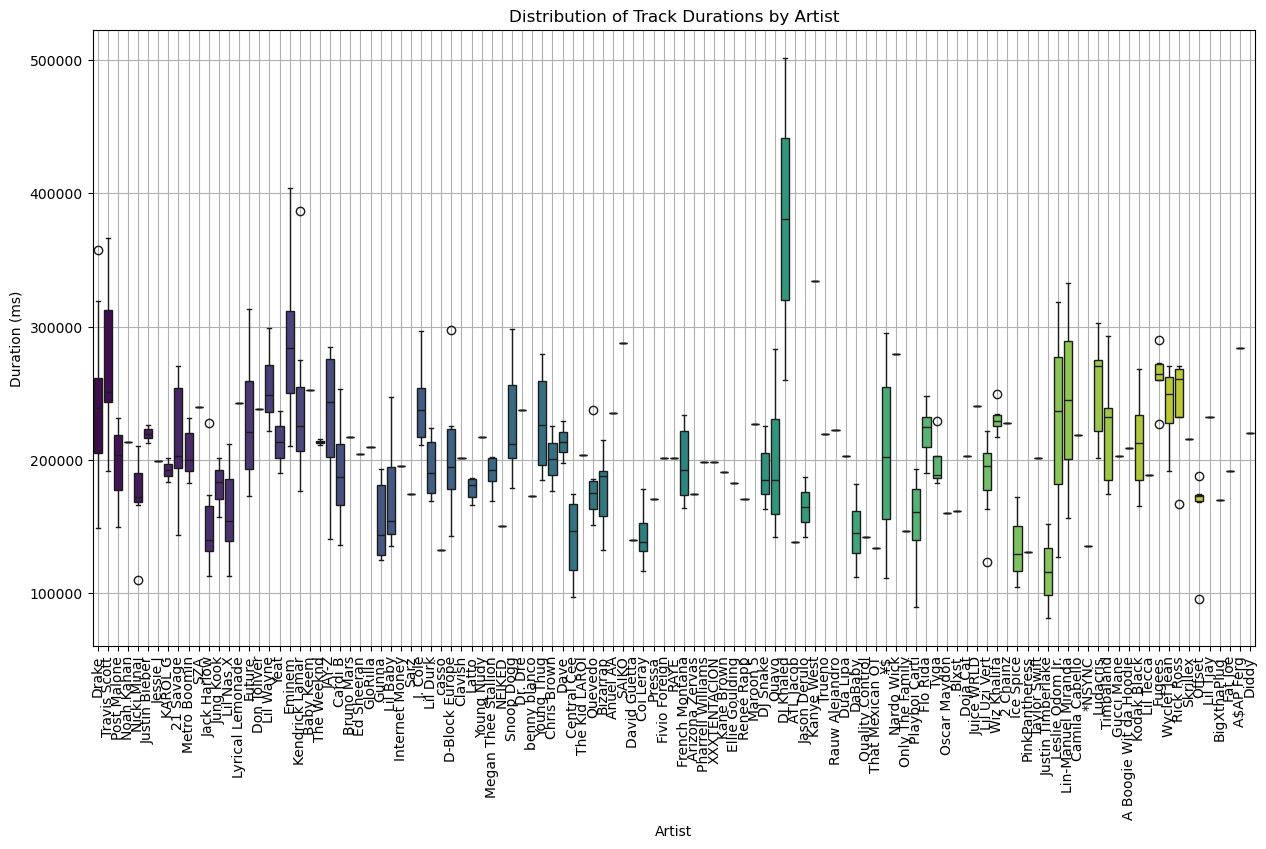

C:\Users\abhis\AppData\Local\Temp\ipykernel_47420\1140995106.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Artist', y='Duration (ms)', data=df, palette='viridis')


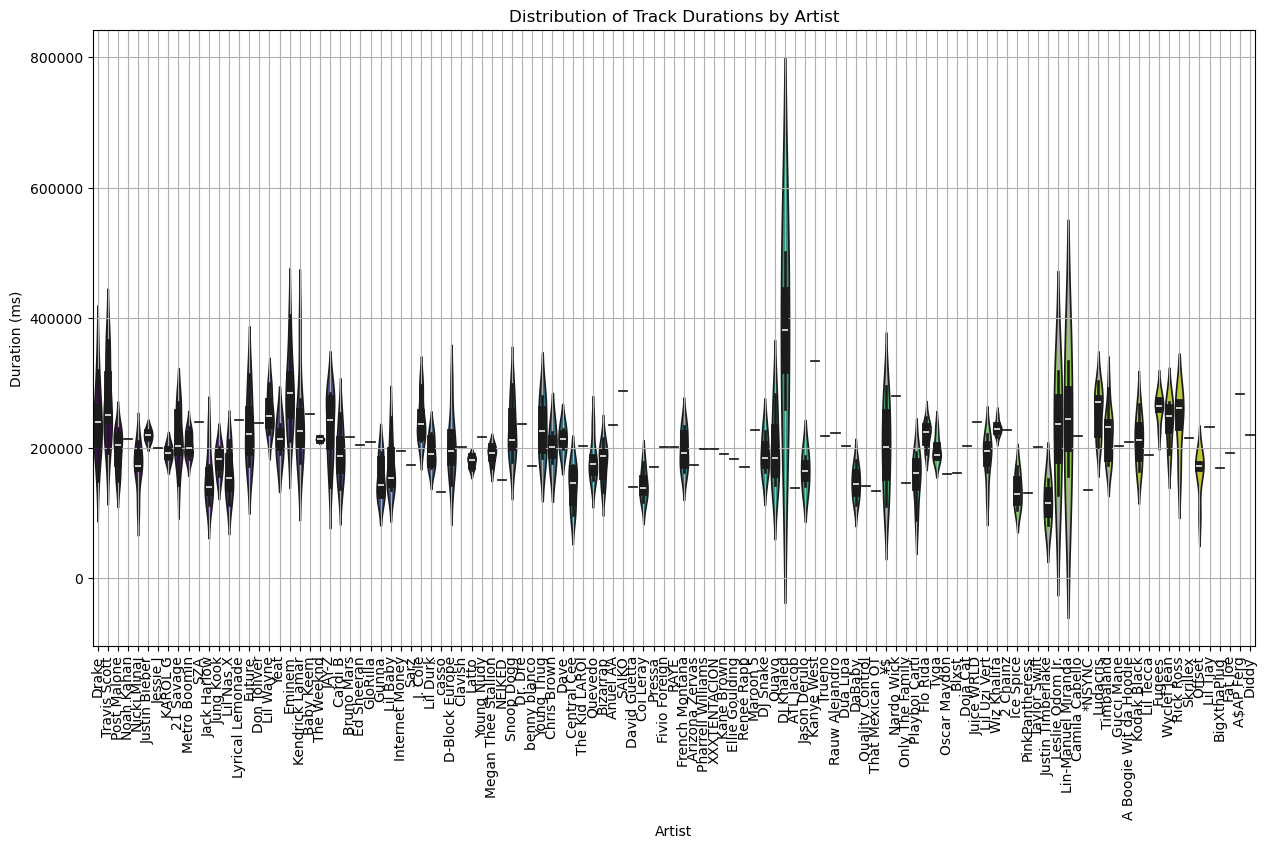

In [20]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Artist', y='Duration (ms)', data=df, palette='viridis')
plt.title('Distribution of Track Durations by Artist')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
plt.figure(figsize=(15, 8))
sns.violinplot(x='Artist', y='Duration (ms)', data=df, palette='viridis')
plt.title('Distribution of Track Durations by Artist')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

#### 10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot

In [ ]:
# Display the column names
print("Column Names in the Dataset:\n", df.columns)
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(15, 8))

# Create a swarm plot for the 'Popularity' column by 'Artist'
sns.swarmplot(x='Artist', y='Popularity', data=df, palette='viridis')

# Add labels and title
plt.title('Distribution of Track Popularity by Artist')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
